In [95]:
import pandas as pd, numpy as np
import re
from matplotlib import pyplot as plt

In [96]:
def parse(file_path, pattern="Accuracy Score"):
    scores = []
    count = 0
    print (file_path)
    with open(file_path, 'r') as f:
        line = f.readline()
        while line:
            count = count + 1
            # print ("count : {0}".format(count))
            match = re.search(pattern + "\s*:* (\d*.\d*)", line)
            
            if match:
                score = float(match.group(1))
                # print ("score : {0}".format(score))
                scores.append(score)
            line = f.readline()

    return scores

In [97]:
xgboost_scores = parse("./results/XGBoost/xgboost_output.txt")
svc_scores = parse("./results/svc/svc_output.txt")
neural_network_scores = parse("./results/neural_network/neural_network_output.txt")

./results/XGBoost/xgboost_output.txt
./results/svc/svc_output.txt
./results/neural_network/neural_network_output.txt


In [204]:
cyan_diamond = dict(markerfacecolor='c', marker='D')
blue_diamond = dict(markerfacecolor='b', marker='D')
magenta_diamond = dict(markerfacecolor='m', marker='D')

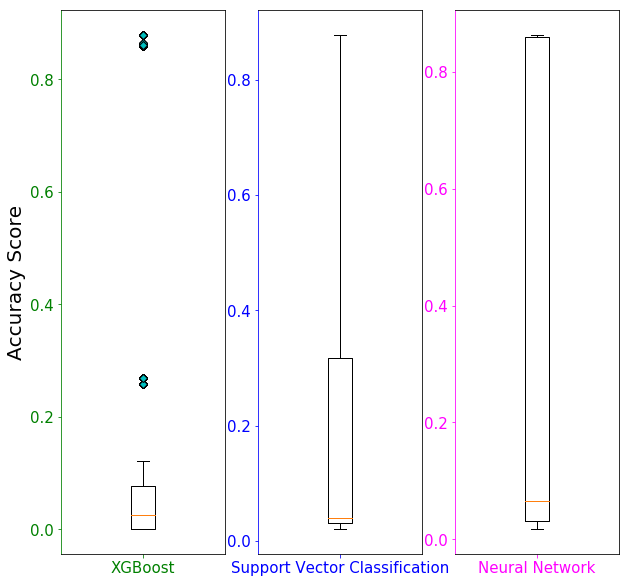

In [242]:
fig = plt.figure(figsize=[10, 10])


ax1 = fig.add_subplot(131)
ax1.boxplot(xgboost_scores, whis=2, usermedians=[0.024210444278385725], labels = ['XGBoost'],\
            flierprops = cyan_diamond)
ax1.spines['left'].set_color('green')
ax1.tick_params(axis='both', colors='green', labelsize = 15)
ax1.set_ylabel("Accuracy Score", fontsize = 20)


ax2 = fig.add_subplot(132)
ax2.boxplot(svc_scores, whis=2, usermedians=[0.03926197570479028], labels = ['Support Vector Classification'], \
            flierprops = blue_diamond)
ax2.spines['left'].set_color('blue')
ax2.tick_params(axis='both', colors='blue', labelsize=15)

ax3 = fig.add_subplot(133)
ax3.boxplot(neural_network_scores, whis=2, usermedians=[0.06511743051130295], labels = ['Neural Network'], \
            flierprops = magenta_diamond)
ax3.spines['left'].set_color('magenta')
ax3.tick_params(axis='both', colors='magenta', labelsize=15)

plt.show()
fig.savefig("./box_plot_Accuracy.png")

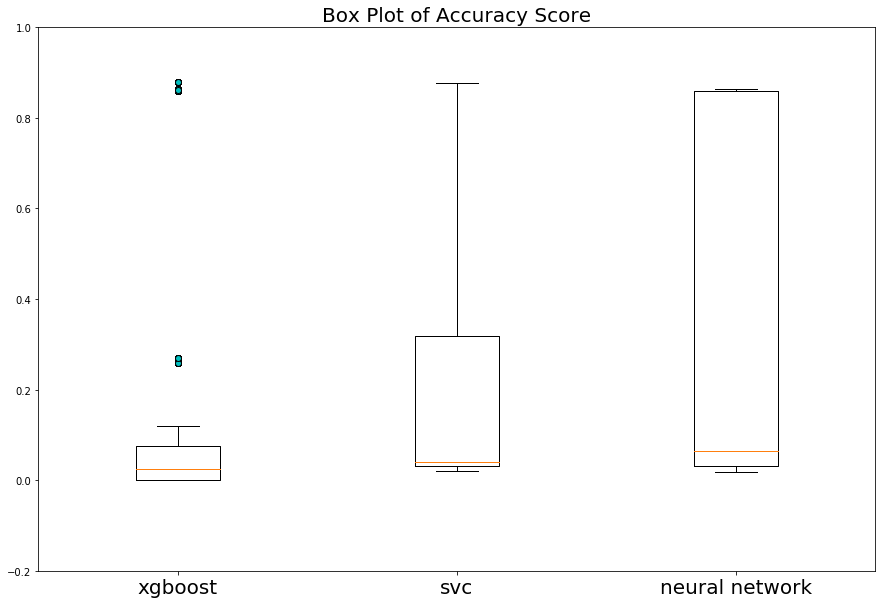

In [170]:
fig = plt.figure(figsize=[15,10])
ax = plt.axes()
plt.boxplot([xgboost_scores, svc_scores, neural_network_scores], whis=2,\
            usermedians=[0.024210444278385725, 0.03926197570479028, 0.06511743051130295],\
            flierprops=cyan_diamond)
plt.ylim(-0.2, 1)
plt.title("Box Plot of Accuracy Score", fontsize=20)
ax.set_xticklabels(['xgboost', 'svc', 'neural network'], fontsize=20)
fig.savefig('./box_plot_accuracy.png')
#plt.show()

In [80]:
xgboost_mse = parse("./results/XGBoost/xgboost_output.txt", "Mean Absolute Error")
prophet_mse = parse("./results/prophet/prophet_output.txt", "Metric mse")
multi_regression_mse = parse("./results/multi_regression/multi_regression_output.txt", "The MSE of prediction is")

./results/XGBoost/xgboost_output.txt
./results/prophet/prophet_output.txt
./results/multi_regression/multi_regression_output.txt


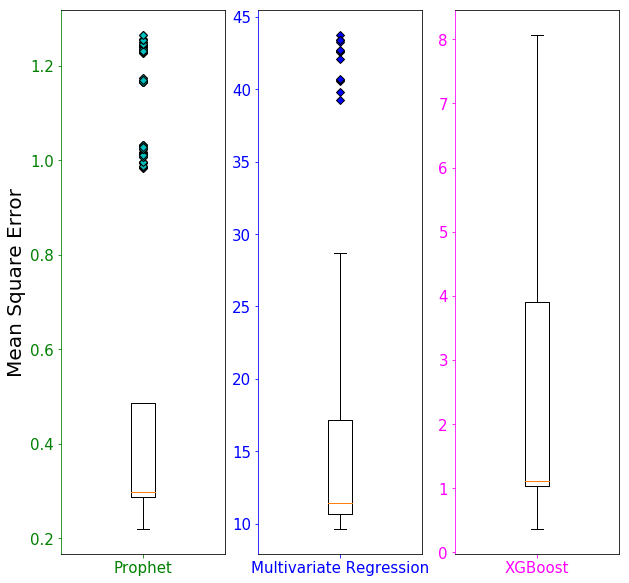

In [244]:
fig = plt.figure(figsize=[10, 10])


ax1 = fig.add_subplot(131)
ax1.boxplot(prophet_mse, whis=2, usermedians=[0.29742817421625595], labels = ['Prophet'],\
            flierprops = cyan_diamond)
ax1.spines['left'].set_color('green')
ax1.tick_params(axis='both', colors='green', labelsize = 15)
ax1.set_ylabel("Mean Square Error", fontsize = 20)


ax2 = fig.add_subplot(132)
ax2.boxplot(multi_regression_mse, whis=2, usermedians=[11.445971625426504], labels = ['Multivariate Regression'], \
            flierprops = blue_diamond)
ax2.spines['left'].set_color('blue')
ax2.tick_params(axis='both', colors='blue', labelsize=15)

ax3 = fig.add_subplot(133)
ax3.boxplot(xgboost_mse, whis=2, usermedians=[1.1064039558425396], labels = ['XGBoost'], flierprops = magenta_diamond)
ax3.spines['left'].set_color('magenta')
ax3.tick_params(axis='both', colors='magenta', labelsize=15)

plt.show()
fig.savefig("./box_plot_MSE.png")

In [246]:
import pandas as pd

In [247]:
df = pd.read_csv("./datasets/xgboost/df_2017_further_reduced.csv")

In [249]:
df.columns

Index(['LR_Diff', 'GradeValue', 'SizerSize', 'SizerGrade', 'CupWeight',
       'Offset', 'Green', 'Dark Green', 'Start of Batch', 'Texture',
       'Stem Area', 'Smoothness', 'Flatness', 'Major Diameter (mm)',
       'Cyclic Rod Number', 'Trip Rod', 'Fruit Center X (mm)',
       'Fruit Center Y (mm)', 'block_Num'],
      dtype='object')